## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '../input/dataset-a/Dataset_python/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '../input/dataset-a/Dataset_python/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87916544/87910968 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('../input/dataset-a/Dataset_python/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('../input/dataset-a/Dataset_python/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7771 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('../input/dataset-a/Dataset_python/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1943 images belonging to 4 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
243/243 [==============================] - 126s 494ms/step - loss: 2.1476 - accuracy: 0.7684 - val_loss: 0.4251 - val_accuracy: 0.9279
Epoch 2/20
243/243 [==============================] - 96s 396ms/step - loss: 0.3735 - accuracy: 0.9372 - val_loss: 0.9604 - val_accuracy: 0.9017
Epoch 3/20
243/243 [==============================] - 95s 389ms/step - loss: 0.5244 - accuracy: 0.9393 - val_loss: 0.3359 - val_accuracy: 0.9537
Epoch 4/20
243/243 [==============================] - 94s 389ms/step - loss: 0.2062 - accuracy: 0.9695 - val_loss: 0.4626 - val_accuracy: 0.9444
Epoch 5/20
243/243 [==============================] - 96s 395ms/step - loss: 0.2373 - accuracy: 0.9735 - val_loss: 0.3126 - val_accuracy: 0.9655
Epoch 6/20
243/243 [==============================] - 96s 394ms/step - loss: 0.3697 - accuracy: 0.9609 - val_loss: 0.6595 - val_accuracy: 0.9382
Epoch 7/20
243/243 [==============================] - 96s 393ms/step - loss: 0.2492 - accuracy: 0.9737 - val_loss: 0.2851 - val_a

In [15]:
import matplotlib.pyplot as plt 

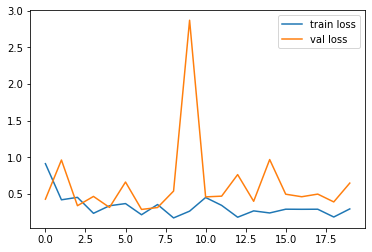

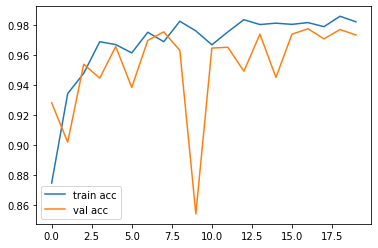

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception_a.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.1760794e-29, 1.0000000e+00, 6.5421624e-33],
       ...,
       [8.6651460e-16, 3.3558332e-09, 8.2265302e-08, 9.9999988e-01],
       [5.6717621e-31, 9.1511970e-03, 5.2149643e-28, 9.9084878e-01],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 1, 2, ..., 3, 3, 2])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_inception_a.h5')

In [24]:
img_data

NameError: name 'img_data' is not defined

In [25]:
img=image.load_img('../input/dataset-a/Dataset_python/test/test/AppleScab1.JPG',target_size=(224,224))



In [26]:
x=image.img_to_array(img)
x

array([[[160., 148., 152.],
        [161., 149., 153.],
        [161., 149., 153.],
        ...,
        [145., 129., 130.],
        [142., 126., 127.],
        [140., 124., 125.]],

       [[160., 148., 152.],
        [160., 148., 152.],
        [160., 148., 152.],
        ...,
        [141., 125., 126.],
        [139., 123., 124.],
        [138., 122., 123.]],

       [[162., 150., 154.],
        [161., 149., 153.],
        [160., 148., 152.],
        ...,
        [141., 125., 126.],
        [142., 126., 127.],
        [142., 126., 127.]],

       ...,

       [[151., 144., 151.],
        [150., 143., 150.],
        [148., 141., 148.],
        ...,
        [ 94.,  84.,  83.],
        [ 92.,  82.,  81.],
        [ 92.,  82.,  81.]],

       [[148., 141., 148.],
        [147., 140., 147.],
        [147., 140., 147.],
        ...,
        [ 93.,  83.,  82.],
        [ 92.,  82.,  81.],
        [ 91.,  81.,  80.]],

       [[144., 137., 144.],
        [144., 137., 144.],
        [145., 1

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

array([[2.2474031e-13, 5.3373667e-22, 1.0000000e+00, 7.7432563e-21]],
      dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a==1

array([False])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__